In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import heapq
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,
    mean_squared_error,mean_absolute_error, r2_score, roc_auc_score, roc_curve, recall_score
)
from sklearn.linear_model import LogisticRegression

In [56]:
df = pd.read_csv("D:\\CHIA-EDU\\AI\\kaggle\\NLPSentimentAnalysisTwitter.csv", encoding='ISO-8859-1', header=None)
df.columns = ["target", "ids", "date", "flag", "user", "text"]

df["target"] = df["target"].replace({4: 1})

In [57]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [59]:
df.describe()

,target,ids
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [60]:
list(df.columns)

['target', 'ids', 'date', 'flag', 'user', 'text']

In [61]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [62]:
print("unique columns in the dataset are:")
for col in df.columns:
  print(f"unique count in '{col}:")
  print(df[col].nunique())
  print(df[col].value_counts())
  print("\n")

unique columns in the dataset are:
unique count in 'target:
2
target
0    800000
1    800000
Name: count, dtype: int64


unique count in 'ids:
1598315
ids
1755608533    2
2060924350    2
1563536334    2
1990483204    2
1975441103    2
             ..
1467814119    1
1467814180    1
1467814192    1
1467814438    1
1467812416    1
Name: count, Length: 1598315, dtype: int64


unique count in 'date:
774363
date
Mon Jun 15 12:53:14 PDT 2009    20
Fri May 22 05:10:17 PDT 2009    17
Fri May 29 13:40:04 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 11:05:33 PDT 2009    16
                                ..
Mon Jun 15 14:18:23 PDT 2009     1
Tue Jun 16 08:36:58 PDT 2009     1
Tue Jun 16 08:36:45 PDT 2009     1
Tue Jun 16 08:34:52 PDT 2009     1
Mon Apr 06 22:20:50 PDT 2009     1
Name: count, Length: 774363, dtype: int64


unique count in 'flag:
1
flag
NO_QUERY    1600000
Name: count, dtype: int64


unique count in 'user:
659775
user
lost_dog           549
webwoke            345
t

C:\Users\Bhoomika Beniwal\AppData\Local\Temp\ipykernel_4492\2418608016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="coolwarm")


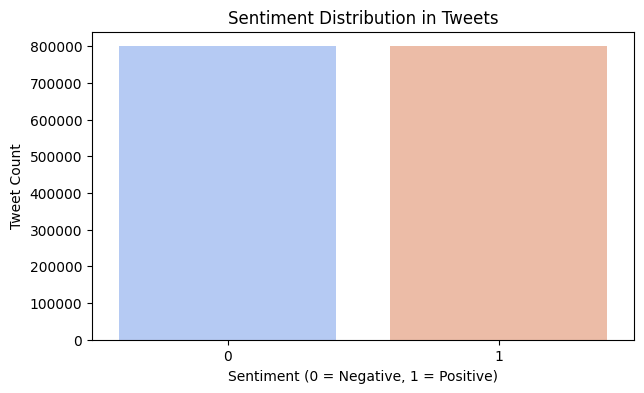

In [63]:
plt.figure(figsize=(7,4))
sns.countplot(x=df["target"], palette="coolwarm")
plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Tweet Count")
plt.show()

Train Accuracy: 0.8366
Test Accuracy: 0.7616

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.79      0.77    239361
           1       0.78      0.73      0.75    240639

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



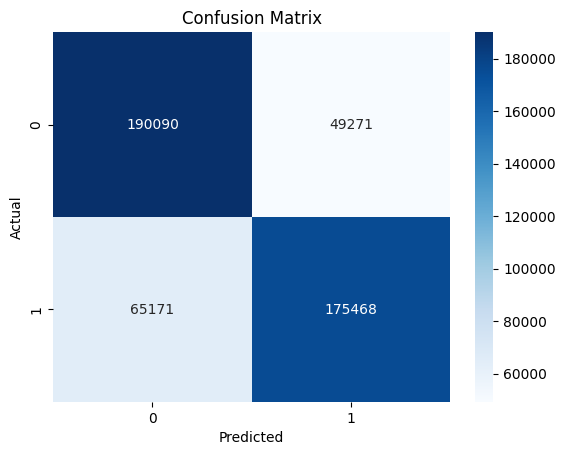

In [ ]:
X = df['text']
y = df['target'].replace(4, 1) 

# 1. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 3. Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 4. Predict
y_train_pred = nb_model.predict(X_train_tfidf)
y_test_pred = nb_model.predict(X_test_tfidf)

# 5. Evaluate
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\Users\Bhoomika Beniwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8084
Test Accuracy: 0.7815

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    239361
           1       0.77      0.80      0.79    240639

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



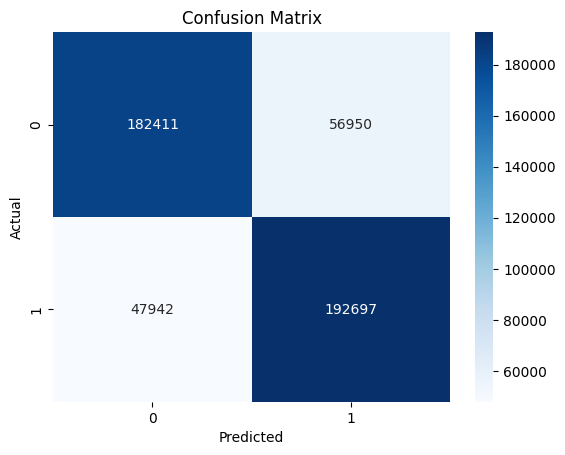

In [54]:
X = df['text']
y = df['target'].replace(4, 1) 

# 1. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 3. Train a Naive Bayes classifier
LR_model = LogisticRegression()
LR_model.fit(X_train_tfidf, y_train)

# 4. Predict
y_train_pred = LR_model.predict(X_train_tfidf)
y_test_pred = LR_model.predict(X_test_tfidf)

# 5. Evaluate
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Train Accuracy: 0.8464
Test Accuracy: 0.7559

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.78      0.76    239361
           1       0.77      0.73      0.75    240639

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000



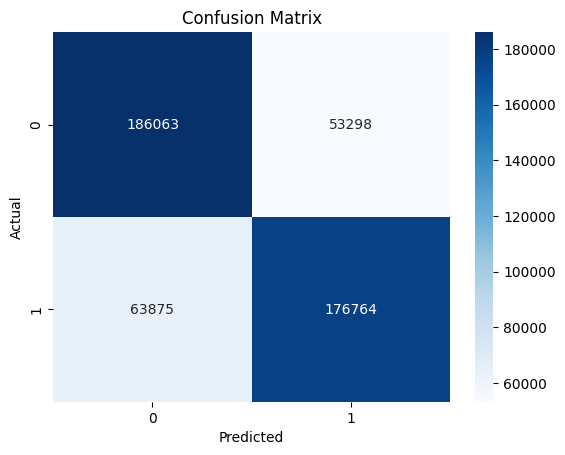

In [64]:
X = df['text']
y = df['target'].replace(4, 1) 

# 1. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Convert text to Bag of Words features
bow_vectorizer = CountVectorizer(stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# 5. Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# 4. Predict
y_train_pred = nb_model.predict(X_train_tfidf)
y_test_pred = nb_model.predict(X_test_tfidf)

# 5. Evaluate
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()